## Analisar Dataset: Eggs, Larvae e Protozoan

Verificar a quantidade de imagens presentes em cada um dos datasets assim como a quantidade dentro de cada espécie. Também verificar o mapeamento entre o arquivo `.csv` com as imagens originais. Para ficar mais simples, a análise será feita dentro de cada um destes grupos separados em seções distintas.

Adendo: os arquivos `.csv's` escolhidos serão aqueles que dividem entre espécies dos parasitas em questão e impurezas no geral. Desta forma tenho:

- Eggs: `Eggs_9.csv`
- Larvae: `Lar_2.csv`
- Protozoan: `Pro_7.csv`

In [27]:
# Importações das bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import os
import random

from PIL import Image
from collections import defaultdict

# Configurar Pandas para exibir melhor as colunas
pd.set_option("display.max_columns", None)  # Exibir todas as colunas
pd.set_option("display.width", 120)        # Largura da exibição no terminal

### Eggs

In [28]:
# Diretórios dos arquivos .csv e das imagens
csv_eggs_path = "dataset/Eggs/Eggs_9.csv"
img_eggs_path = "dataset/Eggs/pre/orig"

# Carregamentos dos arquivos 
df_eggs = pd.read_csv(csv_eggs_path)
df_eggs = df_eggs.sort_values(by=["ID"]) # ordenar df com base na coluna ID

# Ver informações do dataset Eggs
print("Eggs:")
print(df_eggs.info())
df_eggs

Eggs:
<class 'pandas.core.frame.DataFrame'>
Index: 12691 entries, 9124 to 6337
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  12691 non-null  object
 1   Label     12691 non-null  int64 
 2   ID        12691 non-null  int64 
 3   Class     12691 non-null  object
 4   Mask      12691 non-null  object
dtypes: int64(2), object(3)
memory usage: 594.9+ KB
None


,filename,Label,ID,Class,Mask
9124,pre/orig/000001_00000001.png,1,1,H.nana,pre/label/000001_00000001.png
11234,pre/orig/000001_00000002.png,1,2,H.nana,pre/label/000001_00000002.png
8302,pre/orig/000001_00000003.png,1,3,H.nana,pre/label/000001_00000003.png
12005,pre/orig/000001_00000004.png,1,4,H.nana,pre/label/000001_00000004.png
8428,pre/orig/000001_00000005.png,1,5,H.nana,pre/label/000001_00000005.png
...,...,...,...,...,...
1967,pre/orig/000016_00012687.png,9,12687,impurities,pre/label/000016_00012687.png
2690,pre/orig/000016_00012688.png,9,12688,impurities,pre/label/000016_00012688.png
3305,pre/orig/000016_00012689.png,9,12689,impurities,pre/label/000016_00012689.png
11489,pre/orig/000016_00012690.png,9,12690,impurities,pre/label/000016_00012690.png


In [29]:
print("Quantidade total de amostras no csv (Eggs):", len(df_eggs))
print("Quantidade total de imagens (Eggs):", len(os.listdir(img_eggs_path)))
print("Quantidade de amostras por classe (Eggs):")
print(df_eggs["Class"].value_counts())

Quantidade total de amostras no csv (Eggs): 12691
Quantidade total de imagens (Eggs): 12691
Quantidade de amostras por classe (Eggs):
Class
impurities          9815
A.lumbricoides       835
H.nana               501
T.trichiura          435
Taenia parasites     379
Ancilostomideo       286
S.mansoni            254
E.vermicularis       103
H.diminuta            83
Name: count, dtype: int64


In [30]:
#Pegar a relação de label e class para o dataset Eggs
eggs_labels = df_eggs["Label"].unique()
eggs_classes = df_eggs["Class"].unique()

# Criar um dicionário para mapear as classes e ordená-lo com base no label
eggs_class_dict = dict(zip(eggs_labels, eggs_classes))
eggs_class_dict = dict(sorted(eggs_class_dict.items()))

# Mostrar o mapeamento
print("Mapeamento de Classes (Eggs):")
for label, classe in eggs_class_dict.items():
    print(f"{label}: {classe}")

Mapeamento de Classes (Eggs):
1: H.nana
2: H.diminuta
3: Ancilostomideo
4: E.vermicularis
5: A.lumbricoides
6: T.trichiura
7: S.mansoni
8: Taenia parasites
9: impurities


Para garantir que os dados no arquivo `.csv` correspondam às imagens presentes nos diretórios, foi identificado que o mapeamento não ocorre de forma direta. No arquivo `.csv`, a numeração dos arquivos é sequencial e contínua, independentemente da classe das imagens. Em contraste, nos diretórios onde as imagens originais estão armazenadas, a numeração é feita de forma independente para cada classe, ou seja, reinicia a contagem sempre que uma nova classe é iniciada.

Sendo assim, será necessário realizar um tratamento para que os mapeamentos sejam iguais para verificar se todas as imagens estão presentes.

In [31]:
# Pegar os filenames do csv 
# Formato dos filenames: "path/Label_ID.png" [pre/orig/000009_00000502.png]
filenames_protozoan = df_eggs["filename"].values

# Separar em duas partes: antes e depois do '/'
# Exemplo: "pre/orig/000009_00000502.png" -> ["pre/orig", "000009_00000502.png"]
# Armazenar apenas a segunda parte -> "000009_00000502.png"
names_eggs = []
for file in filenames_protozoan:
    path, name = file.rsplit("/", 1)
    names_eggs.append(name)

names_eggs = sorted(names_eggs)  

# Dicionário para agrupar por classe
grouped_files_eggs = defaultdict(list) 

# Agrupar os arquivos por classe (primeira parte do nome)
# Exemplo: "000009_00000502.png" -> "000009"
for filename in names_eggs:
    class_part, id = filename.split("_", 1)  # Separar a classe
    grouped_files_eggs[class_part].append(filename)
    
# Os grupos class_part de 9 a 16 serão agrupados apenas no grupo 9, mantendo o conteúdo interno
# Exemplo: "000010_00001639.png" -> "000009"
for class_part in list(grouped_files_eggs.keys()):
    if class_part in ["000010", "000011", "000012", "000013", "000014", "000015", "000016"]:
        grouped_files_eggs["000009"].extend(grouped_files_eggs[class_part])
        del grouped_files_eggs[class_part]
        
# Processar cada grupo para reiniciar a contagem de IDs
# Exemplo: "000009_00000502.png" -> "000009_00000001.png"
updated_list_eggs = []
for class_part, files in grouped_files_eggs.items():
    for index, filename in enumerate(files):
        new_id = str(int(index) + 1).zfill(8)
        _, extension = filename.rsplit(".", 1)
        new_filename = f"{class_part}_{new_id}.{extension}"
        # print(class_part, filename, index, new_id, extension, new_filename)
        updated_list_eggs.append(new_filename)
                
updated_list_eggs.sort()  

# Pegar todos os arquivos do diretório eggs
all_files_eggs = os.listdir(img_eggs_path)
all_files_eggs = sorted(all_files_eggs)

# Verificar se todos os arquivos estão presentes, se estiver certo confirma a mensagem senão exibe a mensagem de erro
if all_files_eggs == updated_list_eggs:
    print("Os arquivos estão corretos!")
else:
    print("Os arquivos estão incorretos!")    

Os arquivos estão corretos!


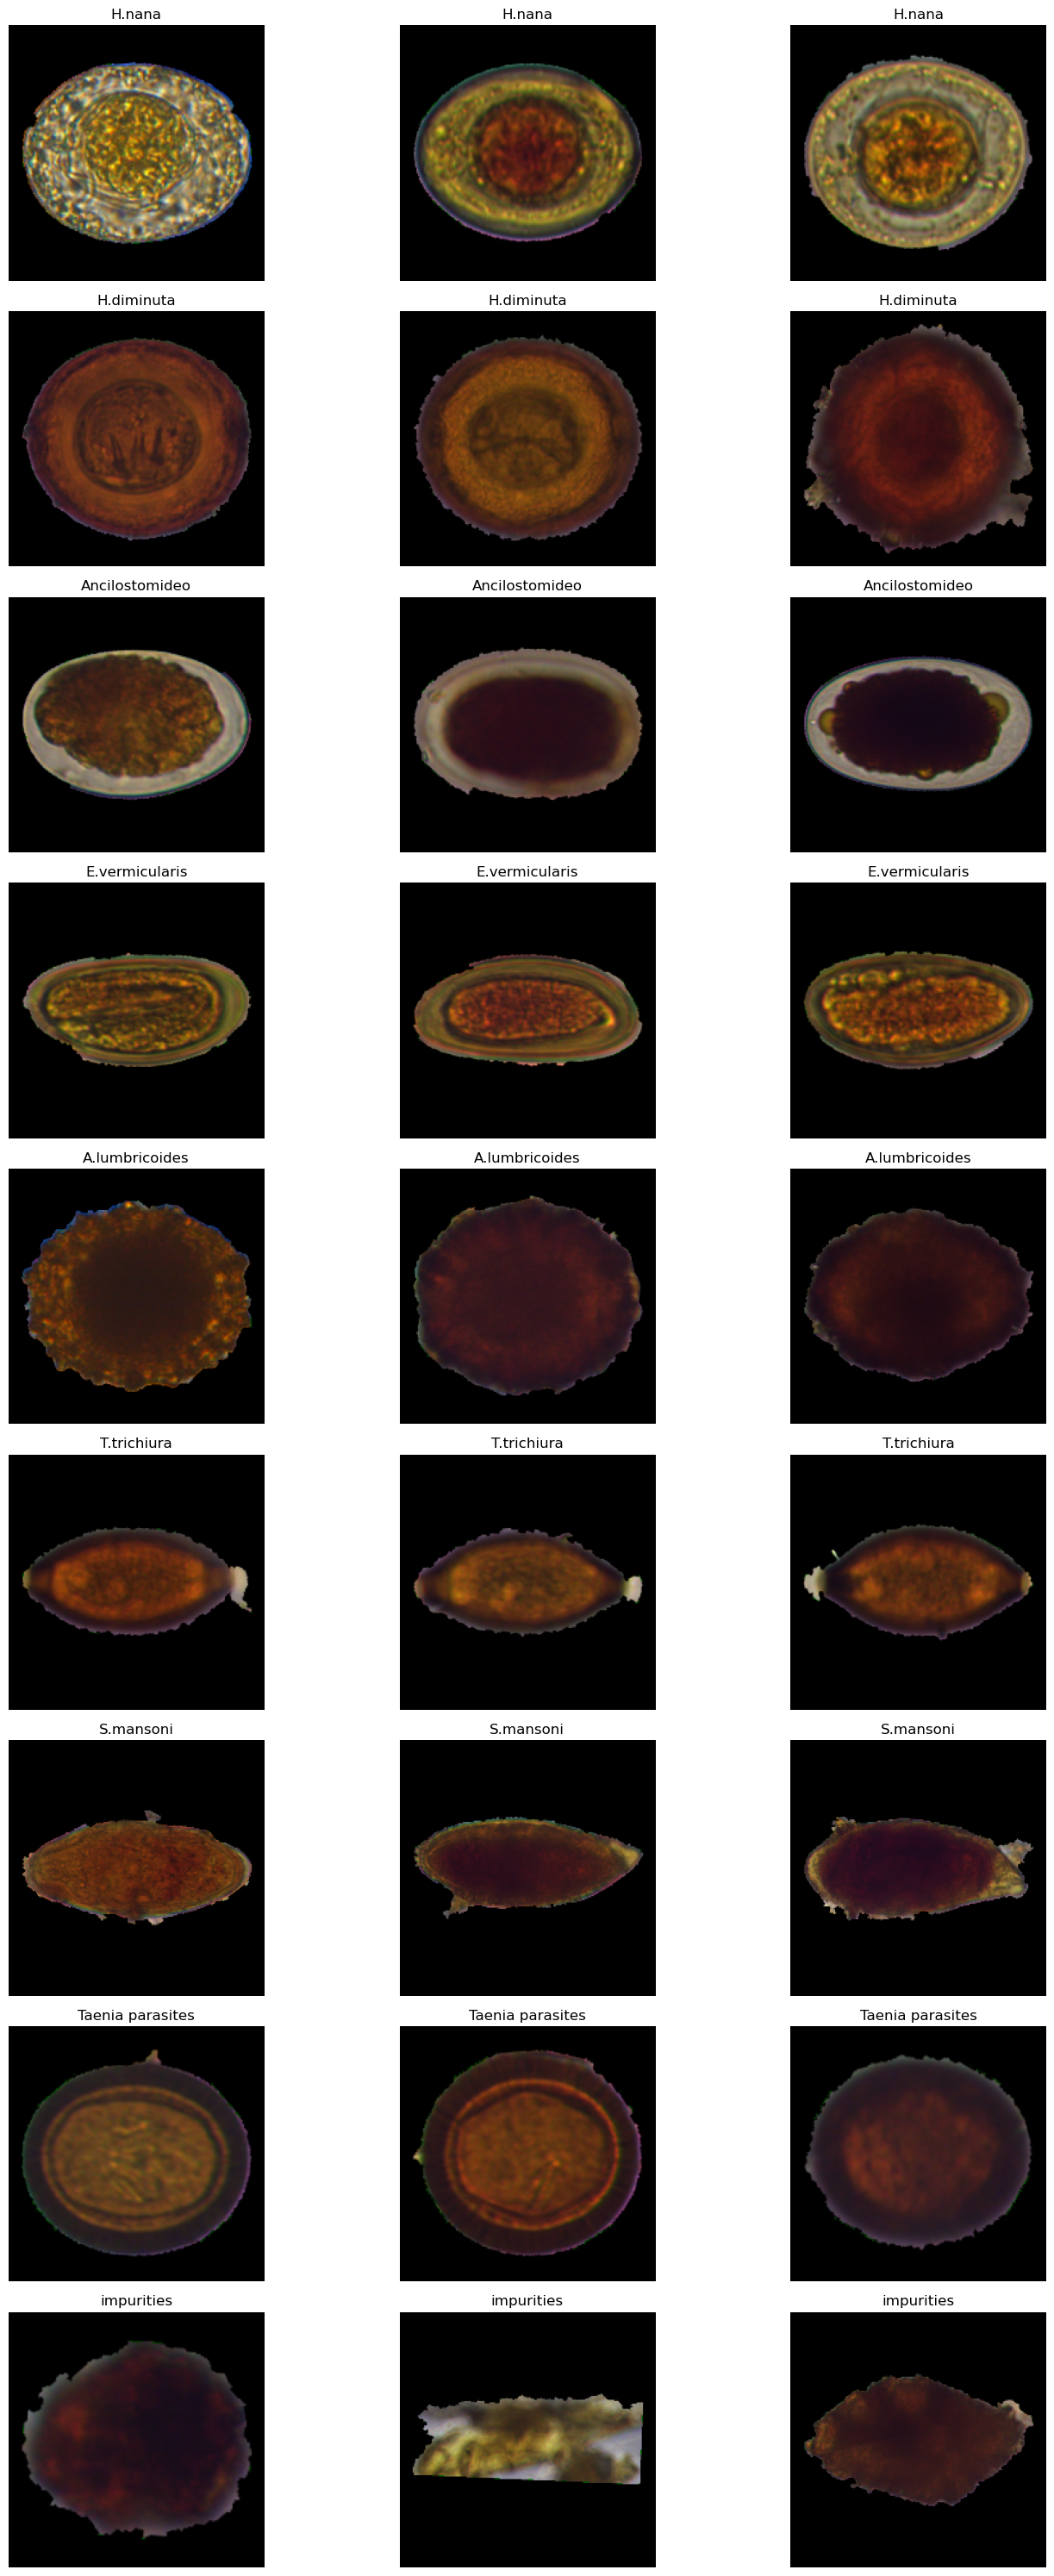

In [32]:
# Mostrar as imagens de cada label dentro do diretório

# Pegar os arquivos de cada label
label_1 = [file for file in all_files_eggs if file.startswith("000001_")]
label_2 = [file for file in all_files_eggs if file.startswith("000002_")]
label_3 = [file for file in all_files_eggs if file.startswith("000003_")]
label_4 = [file for file in all_files_eggs if file.startswith("000004_")]
label_5 = [file for file in all_files_eggs if file.startswith("000005_")]
label_6 = [file for file in all_files_eggs if file.startswith("000006_")]
label_7 = [file for file in all_files_eggs if file.startswith("000007_")]
label_8 = [file for file in all_files_eggs if file.startswith("000008_")]
label_9 = [file for file in all_files_eggs if file.startswith("000009_")]

# Escolher aleatoriamente 3 imagens de cada label
random.seed(42)
label_1 = random.sample(label_1, 3)
label_2 = random.sample(label_2, 3)
label_3 = random.sample(label_3, 3)
label_4 = random.sample(label_4, 3)
label_5 = random.sample(label_5, 3)
label_6 = random.sample(label_6, 3)
label_7 = random.sample(label_7, 3)
label_8 = random.sample(label_8, 3)
label_9 = random.sample(label_9, 3)

# Mostrar as imagens em que cada linha tem as subimagens de uma label
fig, ax = plt.subplots(9, 3, figsize=(15, 30))

# pegar o segundo elemento de eggs_class_dict e colocar numa lista
classes = list(eggs_class_dict.values())

for i, label in enumerate([label_1, label_2, label_3, label_4, label_5, label_6, label_7, label_8, label_9]):
    for j, file in enumerate(label):
        img = Image.open(os.path.join(img_eggs_path, file))
        ax[i, j].imshow(img)
        ax[i, j].set_title(classes[i])
        ax[i, j].axis("off")
        
plt.tight_layout()
plt.show()
plt.close()

### Larvae

In [33]:
# Diretórios dos arquivos .csv e das imagens
csv_larvae_path = "dataset/Larvae/Lar_2.csv"
img_larvae_path = "dataset/Larvae/pre/orig"

# Carregamento dos arquivos
df_larvae = pd.read_csv(csv_larvae_path)
df_larvae = df_larvae.sort_values(by=["ID"]) # ordenar df com base na coluna ID

# Ver informações do dataset Larvae
print("Larvae:")
print(df_larvae.info())
df_larvae

Larvae:
<class 'pandas.core.frame.DataFrame'>
Index: 1598 entries, 1150 to 948
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  1598 non-null   object
 1   Label     1598 non-null   int64 
 2   ID        1598 non-null   int64 
 3   Class     1598 non-null   object
 4   Mask      1598 non-null   object
dtypes: int64(2), object(3)
memory usage: 74.9+ KB
None


,filename,Label,ID,Class,Mask
1150,pre/orig/000001_00000001.png,1,1,S.stercoralis,pre/label/000001_00000001.png
1405,pre/orig/000001_00000002.png,1,2,S.stercoralis,pre/label/000001_00000002.png
1043,pre/orig/000001_00000003.png,1,3,S.stercoralis,pre/label/000001_00000003.png
1505,pre/orig/000001_00000004.png,1,4,S.stercoralis,pre/label/000001_00000004.png
1058,pre/orig/000001_00000005.png,1,5,S.stercoralis,pre/label/000001_00000005.png
...,...,...,...,...,...
230,pre/orig/000002_00001594.png,2,1594,Impurities,pre/label/000002_00001594.png
183,pre/orig/000002_00001595.png,2,1595,Impurities,pre/label/000002_00001595.png
1249,pre/orig/000002_00001596.png,2,1596,Impurities,pre/label/000002_00001596.png
107,pre/orig/000002_00001597.png,2,1597,Impurities,pre/label/000002_00001597.png


In [34]:
print("Quantidade total de amostras no csv (Larvae):", len(df_larvae))
print("Quantidade total de imagens (Larvae):", len(os.listdir(img_larvae_path)))
print("Quantidade de amostras por classe (Larvae):")
print(df_larvae["Class"].value_counts())

Quantidade total de amostras no csv (Larvae): 1598
Quantidade total de imagens (Larvae): 1598
Quantidade de amostras por classe (Larvae):
Class
Impurities       1351
S.stercoralis     247
Name: count, dtype: int64


In [35]:
#Pegar a relação de label e class para o dataset Larvae
larvae_labels = df_larvae["Label"].unique()
larvae_classes = df_larvae["Class"].unique()

# Criar um dicionário para mapear as classes e ordená-lo com base no label
larvae_class_dict = dict(zip(larvae_labels, larvae_classes))
larvae_class_dict = dict(sorted(larvae_class_dict.items()))

# Mostrar o mapeamento
print("Mapeamento de Classes (Larvae):")
for label, classe in larvae_class_dict.items():
    print(f"{label}: {classe}")

Mapeamento de Classes (Larvae):
1: S.stercoralis
2: Impurities


Para garantir que os dados no arquivo `.csv` correspondam às imagens presentes nos diretórios, foi identificado que o mapeamento não ocorre de forma direta. No arquivo `.csv`, a numeração dos arquivos é sequencial e contínua, independentemente da classe das imagens. Em contraste, nos diretórios onde as imagens originais estão armazenadas, a numeração é feita de forma independente para cada classe, ou seja, reinicia a contagem sempre que uma nova classe é iniciada.

In [36]:
# Pegar os filenames do csv 
# Formato dos filenames: "path/Label_ID.png" [pre/orig/000002_00000248.png]
filenames_larvae = df_larvae["filename"].values

# Separar em duas partes: antes e depois do '/'
# Exemplo: "pre/orig/000002_00000248.png" -> ["pre/orig", "000002_00000248.png"]
# Armazenar apenas a segunda parte -> "000002_00000248.png"
names_larvae = []
for file in filenames_larvae:
    path, name = file.rsplit("/", 1)
    names_larvae.append(name)

names_larvae = sorted(names_larvae)  

# Dicionário para agrupar por classe
grouped_files_larvae = defaultdict(list) 

# Agrupar os arquivos por classe (primeira parte do nome)
# Exemplo: "000002_00000248.png" -> "000002"
for filename in names_larvae:
    class_part, id = filename.split("_", 1)  # Separar a classe
    grouped_files_larvae[class_part].append(filename)

# Processar cada grupo para reiniciar a contagem de IDs
updated_list_larvae = []
for class_part, files in grouped_files_larvae.items():
    for index, filename in enumerate(files):
        # Gerar nova ID
        new_id = str(index + 1).zfill(8)  # ID com 8 dígitos
        _, extension = filename.rsplit(".", 1)  # Pegar a extensão
        # Construir o novo nome
        new_filename = f"{class_part}_{new_id}.{extension}"
        updated_list_larvae.append(new_filename)

# Ordenar a lista final 
updated_list_larvae.sort()  

# pegar todos os arquivos do diretório larvae
all_files_larvae = os.listdir(img_larvae_path)
all_files_larvae = sorted(all_files_larvae)

# Verificar se todos os arquivos estão presentes, se estiver certo confirma a mensagem senão exibe a mensagem de erro
if all_files_larvae == updated_list_larvae:
    print("Os arquivos estão corretos!")
else:
    print("Os arquivos estão incorretos!")    

Os arquivos estão corretos!


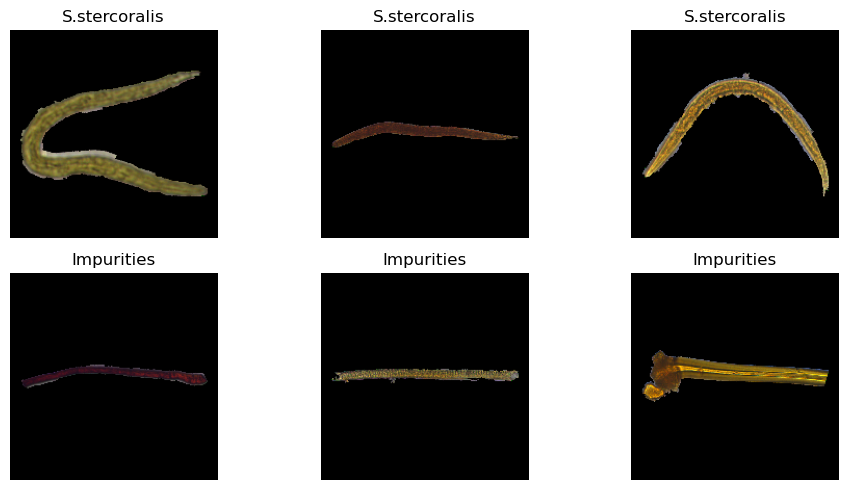

In [37]:
# Mostrar as imagens de cada label dentro do diretório

# Pegar os arquivos de cada label
label_1 = [file for file in all_files_larvae if file.startswith("000001_")]
label_2 = [file for file in all_files_larvae if file.startswith("000002_")]

# Escolher aleatoriamente 3 imagens de cada label
random.seed(42)
label_1 = random.sample(label_1, 3)
label_2 = random.sample(label_2, 3)


# Mostrar as imagens em que cada linha tem as subimagens de uma label
fig, ax = plt.subplots(2, 3, figsize=(10, 5))

# pegar o segundo elemento de eggs_class_dict e colocar numa lista
classes = list(larvae_class_dict.values())

for i, label in enumerate([label_1, label_2]):
    for j, file in enumerate(label):
        img = Image.open(os.path.join(img_larvae_path, file))
        ax[i, j].imshow(img)
        ax[i, j].set_title(classes[i])
        ax[i, j].axis("off")
        
plt.tight_layout()
plt.show()
plt.close()

### Protozoan

In [38]:
# Diretórios dos arquivos .csv e das imagens
csv_protozoan_path = "dataset/Protozoan/Pro_7.csv"
img_protozoan_path = "dataset/Protozoan/pre/orig"

# Carregamento dos arquivos
df_protozoan = pd.read_csv(csv_protozoan_path)
df_protozoan = df_protozoan.sort_values(by=["ID"]) # ordenar df com base na coluna ID

# Ver informações do dataset Protozoan
print("Protozoan:")
print(df_protozoan.info())
df_protozoan

Protozoan:
<class 'pandas.core.frame.DataFrame'>
Index: 37376 entries, 26724 to 31314
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  37376 non-null  object
 1   Label     37376 non-null  int64 
 2   ID        37376 non-null  int64 
 3   Class     37376 non-null  object
 4   Mask      37376 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.7+ MB
None


,filename,Label,ID,Class,Mask
26724,pre/orig/000001_00000001.png,1,1,E.coli,pre/label/000001_00000001.png
33091,pre/orig/000001_00000002.png,1,2,E.coli,pre/label/000001_00000002.png
24116,pre/orig/000001_00000003.png,1,3,E.coli,pre/label/000001_00000003.png
35387,pre/orig/000001_00000004.png,1,4,E.coli,pre/label/000001_00000004.png
24521,pre/orig/000001_00000005.png,1,5,E.coli,pre/label/000001_00000005.png
...,...,...,...,...,...
25439,pre/orig/000012_00037372.png,7,37372,Impurities,pre/label/000012_00037372.png
1625,pre/orig/000012_00037373.png,7,37373,Impurities,pre/label/000012_00037373.png
6107,pre/orig/000012_00037374.png,7,37374,Impurities,pre/label/000012_00037374.png
4302,pre/orig/000012_00037375.png,7,37375,Impurities,pre/label/000012_00037375.png


In [39]:
print("Quantidade total de amostras no csv (Protozoan):", len(df_protozoan))
print("Quantidade total de imagens (Protozoan):", len(os.listdir(img_protozoan_path)))
print("Quantidade de amostras por classe (Protozoan):")
print(df_protozoan["Class"].value_counts())

Quantidade total de amostras no csv (Protozoan): 37376
Quantidade total de imagens (Protozoan): 37372
Quantidade de amostras por classe (Protozoan):
Class
Impurities             28528
I.butschlii             3297
Giardia                 1931
E.nana                  1783
E.coli                   869
E.histolytica            659
B.hominis parasites      309
Name: count, dtype: int64


In [40]:
#Pegar a relação de label e class para o dataset Protozoan
protozoan_labels = df_protozoan["Label"].unique()
protozoan_classes = df_protozoan["Class"].unique()

# Criar um dicionário para mapear as classes e ordená-lo com base no label
protozoan_class_dict = dict(zip(protozoan_labels, protozoan_classes))
protozoan_class_dict = dict(sorted(protozoan_class_dict.items()))

# Mostrar o mapeamento
print("Mapeamento de Classes (Protozoan):")
for label, classe in protozoan_class_dict.items():
    print(f"{label}: {classe}")

Mapeamento de Classes (Protozoan):
1: E.coli
2: E.histolytica
3: E.nana
4: Giardia
5: I.butschlii
6: B.hominis parasites
7: Impurities


In [41]:
# Pegar os filenames do csv
# Formato dos filenames: "path/Label_ID.png" [pre/orig/000007_00000869.png]
filenames_protozoan = df_protozoan["filename"].values

# Separar em duas partes: antes e depois do '/'
# Exemplo: "pre/orig/000007_00000869.png" -> ["pre/orig", "000007_00000869.png"]
# Armazenar apenas a segunda parte -> "000007_00000869.png"
names_protozoan = []
for file in filenames_protozoan:
    path, name = file.rsplit("/", 1)
    names_protozoan.append(name)
    
names_protozoan = sorted(names_protozoan)

# Dicionário para agrupar por classe
grouped_files_protozoan = defaultdict(list)

# Agrupar os arquivos por classe (primeira parte do nome)
# Exemplo: "000007_00000869.png" -> "000007"
for filename in names_protozoan:
    class_part, id = filename.split("_", 1)  # Separar a classe
    grouped_files_protozoan[class_part].append(filename)
    
    
# Os grupos class_part de 8 a 12 serão agrupados apenas no grupo 7, mantendo o conteúdo interno
# Exemplo: "000010_00001639.png" -> "000009"
for class_part in list(grouped_files_protozoan.keys()):
    if class_part in ["000008", "000009", "000010", "000011", "000012"]:
        grouped_files_protozoan["000007"].extend(grouped_files_protozoan[class_part])
        del grouped_files_protozoan[class_part]
        
# Processar cada grupo para reiniciar a contagem de IDs
updated_list_protozoan = []
for class_part, files in grouped_files_protozoan.items():
    for index, filename in enumerate(files):
        new_id = str(int(index) + 1).zfill(8)
        _, extension = filename.rsplit(".", 1)
        new_filename = f"{class_part}_{new_id}.{extension}"
        updated_list_protozoan.append(new_filename)

#print(updated_list_protozoan)

# Pegar todos os arquivos do diretório protozoan
all_files_protozoan = os.listdir(img_protozoan_path)

# Verificar se todos os arquivos estão presentes, se estiver certo confirma a mensagem senão exibe a mensagem de erro
if all_files_protozoan == updated_list_protozoan:
    print("Os arquivos estão corretos!")
else:
    print("Os arquivos estão incorretos!")
    
# Verquais amostras estão faltando
missing_files = set(updated_list_protozoan) - set(all_files_protozoan)
print("Amostras faltando:")
print(missing_files)


Os arquivos estão incorretos!
Amostras faltando:
{'000007_00028528.png', '000007_00028526.png', '000007_00028527.png', '000007_00028525.png'}


In [42]:
# Pegar os filenames do csv 
# Formato dos filenames: "path/Label_ID.png" [pre/orig/000009_00000502.png]
filenames_protozoan = df_protozoan["filename"].values

# Separar em duas partes: antes e depois do '/'
# Exemplo: "pre/orig/000009_00000502.png" -> ["pre/orig", "000009_00000502.png"]
# Armazenar apenas a segunda parte -> "000009_00000502.png"
names_protozoan = []
for file in filenames_protozoan:
    path, name = file.rsplit("/", 1)
    names_protozoan.append(name)

names_protozoan = sorted(names_protozoan)  

# Dicionário para agrupar por classe
grouped_files_protozoan = defaultdict(list) 

# Agrupar os arquivos por classe (primeira parte do nome)
# Exemplo: "000009_00000502.png" -> "000009"
for filename in names_protozoan:
    class_part, id = filename.split("_", 1)  # Separar a classe
    grouped_files_protozoan[class_part].append(filename)
    
# Os grupos class_part de 8 a 12 serão agrupados apenas no grupo 9, mantendo o conteúdo interno
# Exemplo: "000010_00001639.png" -> "000009"
for class_part in list(grouped_files_protozoan.keys()):
    if class_part in ["000008", "000009", "000010", "000011", "000012"]:
        grouped_files_protozoan["000007"].extend(grouped_files_protozoan[class_part])
        del grouped_files_protozoan[class_part]
        
# Processar cada grupo para reiniciar a contagem de IDs
# Exemplo: "000009_00000502.png" -> "000009_00000001.png"
updated_list_protozoan = []
for class_part, files in grouped_files_protozoan.items():
    for index, filename in enumerate(files):
        new_id = str(int(index) + 1).zfill(8)
        _, extension = filename.rsplit(".", 1)
        new_filename = f"{class_part}_{new_id}.{extension}"
        # print(class_part, filename, index, new_id, extension, new_filename)
        updated_list_protozoan.append(new_filename)
                
updated_list_protozoan.sort()  

# Pegar todos os arquivos do diretório protozoan
all_files_protozoan = os.listdir(img_protozoan_path)
all_files_protozoan = sorted(all_files_protozoan)

# Verificar se todos os arquivos estão presentes, se estiver certo confirma a mensagem senão exibe a mensagem de erro
if all_files_protozoan == updated_list_protozoan:
    print("Os arquivos estão corretos!")
else:
    print("Os arquivos estão incorretos!") 
    # falar quantas e quais amostras estão faltando
    missing_files = set(updated_list_protozoan) - set(all_files_protozoan)
    print("Amostras faltando no diretório:")
    print(missing_files)   

Os arquivos estão incorretos!
Amostras faltando no diretório:
{'000007_00028528.png', '000007_00028526.png', '000007_00028527.png', '000007_00028525.png'}


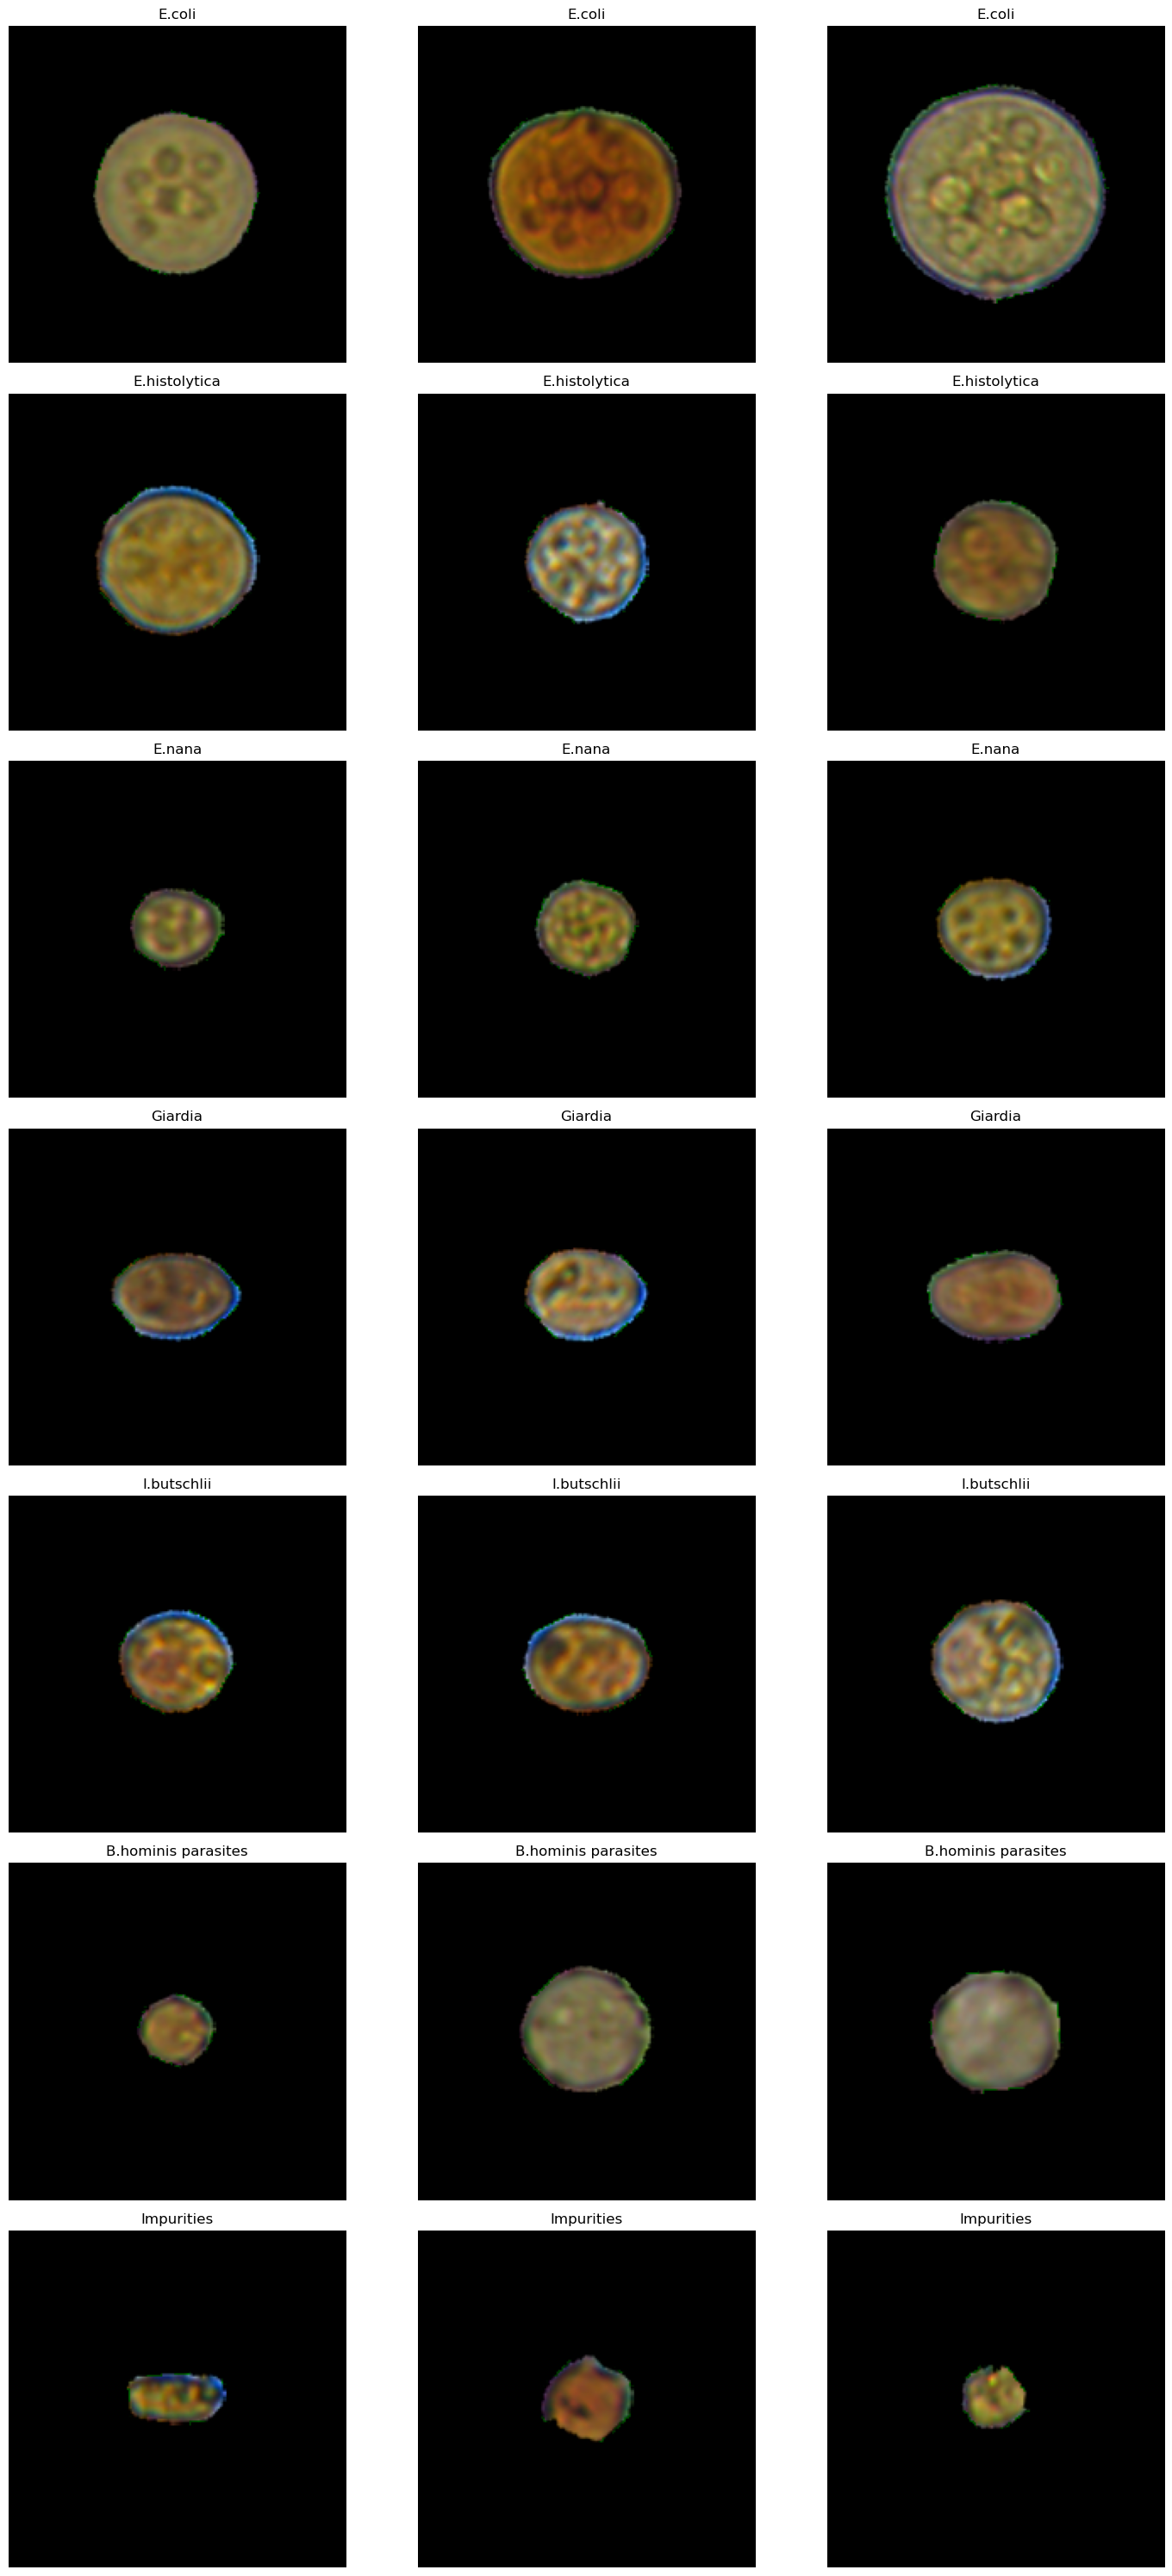

In [43]:
# Mostrar as imagens de cada label dentro do diretório

# Pegar os arquivos de cada label
label_1 = [file for file in all_files_protozoan if file.startswith("000001_")]
label_2 = [file for file in all_files_protozoan if file.startswith("000002_")]
label_3 = [file for file in all_files_protozoan if file.startswith("000003_")]
label_4 = [file for file in all_files_protozoan if file.startswith("000004_")]
label_5 = [file for file in all_files_protozoan if file.startswith("000005_")]
label_6 = [file for file in all_files_protozoan if file.startswith("000006_")]
label_7 = [file for file in all_files_protozoan if file.startswith("000007_")]

# Escolher aleatoriamente 3 imagens de cada label
random.seed(42)
label_1 = random.sample(label_1, 3)
label_2 = random.sample(label_2, 3)
label_3 = random.sample(label_3, 3)
label_4 = random.sample(label_4, 3)
label_5 = random.sample(label_5, 3)
label_6 = random.sample(label_6, 3)
label_7 = random.sample(label_7, 3)

# Mostrar as imagens em que cada linha tem as subimagens de uma label
fig, ax = plt.subplots(7, 3, figsize=(15, 30))

# pegar o segundo elemento de eggs_class_dict e colocar numa lista
classes = list(protozoan_class_dict.values())

for i, label in enumerate([label_1, label_2, label_3, label_4, label_5, label_6, label_7]):
    for j, file in enumerate(label):
        img = Image.open(os.path.join(img_protozoan_path, file))
        ax[i, j].imshow(img)
        ax[i, j].set_title(classes[i])
        ax[i, j].axis("off")
        
plt.tight_layout()
plt.show()
plt.close()